In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

In [2]:
canada_df = pd.read_excel('canada_immigration.xlsx', sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)

#clean the data set
canada_df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
canada_df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
canada_df['Total'] = canada_df.sum(axis=1)
canada_df.set_index('Country', inplace=True)
canada_df.index.name = None
canada_df.columns = list(map(str, canada_df.columns))

years = list(map(str, range(1980, 2014)))
canada_df

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985
Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,15,...,91,77,71,64,60,102,69,46,59,1677


In [3]:
# Pie Chart By Continent
by_continent = canada_df.groupby('Continent', axis=0).sum()
by_continent

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


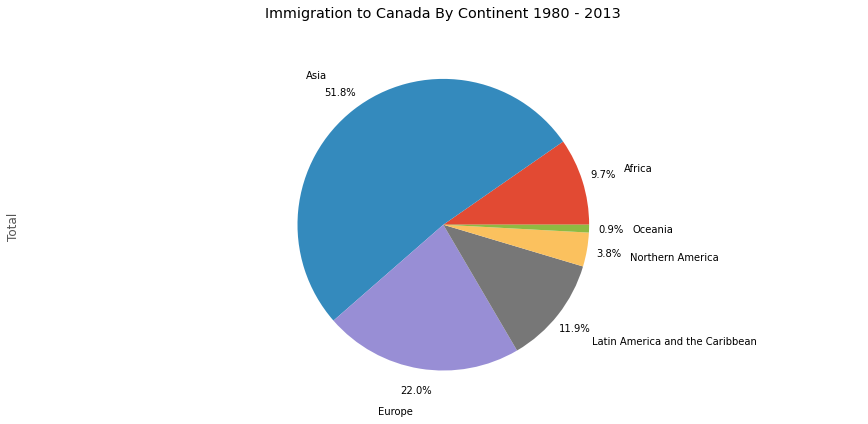

In [4]:
by_continent['Total'].plot(kind='pie',
                           figsize=(15, 6),                           
                           radius=2, 
                           autopct='%1.1f%%', 
                           pctdistance=1.15, 
                           labeldistance=1.3)

plt.title('Immigration to Canada By Continent 1980 - 2013', y=1.12)
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.show()

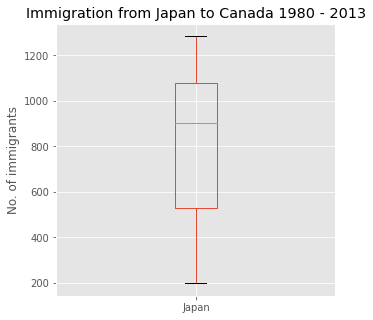

In [5]:
# Box Plot for Japan To Canada
japan = canada_df.loc[['Japan'], years].transpose()
japan.plot(kind='box', figsize=(5,5))

plt.title('Immigration from Japan to Canada 1980 - 2013')
plt.ylabel('No. of immigrants')

plt.show()

In [6]:
# Scatter Plot for Annual Immigration to Canada
immigration_total = pd.DataFrame(canada_df[years].sum(axis=0))
immigration_total.index = map(int, immigration_total.index)
immigration_total.reset_index(inplace = True)
immigration_total.columns = ['year', 'total']

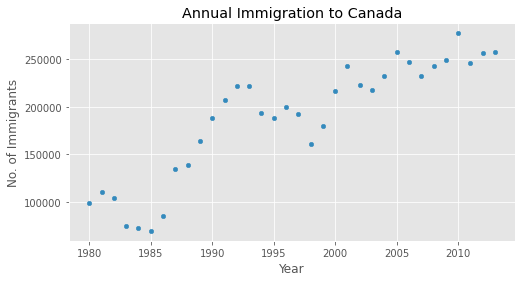

In [7]:
immigration_total.plot(kind='scatter', x='year', y='total', figsize=(8,4))

plt.xlabel('Year')
plt.ylabel('No. of Immigrants')
plt.title('Annual Immigration to Canada')

plt.show()

**Question:** Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

**Note**: You might need to play with the explore values in order to fix any overlapping slice values.

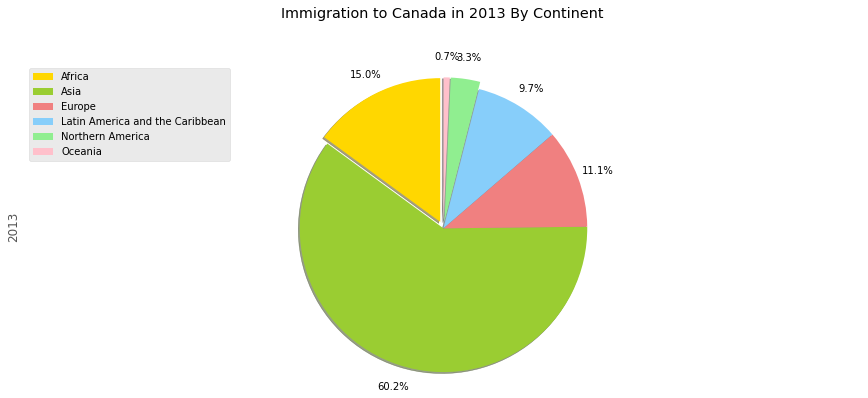

In [8]:
by_continent['2013'].plot(kind='pie', 
                          figsize=(15, 6), 
                          startangle=90,
                          shadow=True, 
                          labels=None,
                          radius=2,
                          autopct='%1.1f%%', 
                          pctdistance=1.15, 
                          labeldistance=1.3,
                          colors=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink'],
                          explode=[0.1, 0, 0, 0, 0.1, 0.1])

plt.title('Immigration to Canada in 2013 By Continent', y=1.12)
plt.axis('equal')
plt.legend(labels=by_continent.index, loc='upper left') 
plt.show()

**Question:** Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

Step 1: Get the dataset for China and India and call the dataframe **df_CI**.

Let's view the percentages associated with both countries using the `describe()` method.

Step 2: Plot data.

In [9]:
df_CI = canada_df.loc[['China', 'India'], years]
df_CI.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,7001.500000,7676.000000,5727.500000,4600.500000,3615.500000,3013.500000,4555.000000,6416.000000,7140.00000,7333.000000,...,32427.000000,39397.000000,33683.000000,28192.000000,29149.000000,29539.000000,32313.000000,28005.500000,31978.500000,33608.000000
std,2656.600177,1405.728281,3421.689714,3871.409627,2953.585025,1693.520741,3669.884194,5335.827771,6197.08383,4256.782823,...,5928.383253,4507.098623,233.345238,777.817459,1255.821643,117.379726,2718.118467,702.157034,1478.560279,736.805266
min,5123.000000,6682.000000,3308.000000,1863.000000,1527.000000,1816.000000,1960.000000,2643.000000,2758.00000,4323.000000,...,28235.000000,36210.000000,33518.000000,27642.000000,28261.000000,29456.000000,30391.000000,27509.000000,30933.000000,33087.000000
25%,6062.250000,7179.000000,4517.750000,3231.750000,2571.250000,2414.750000,3257.500000,4529.500000,4949.00000,5828.000000,...,30331.000000,37803.500000,33600.500000,27917.000000,28705.000000,29497.500000,31352.000000,27757.250000,31455.750000,33347.500000
50%,7001.500000,7676.000000,5727.500000,4600.500000,3615.500000,3013.500000,4555.000000,6416.000000,7140.00000,7333.000000,...,32427.000000,39397.000000,33683.000000,28192.000000,29149.000000,29539.000000,32313.000000,28005.500000,31978.500000,33608.000000
75%,7940.750000,8173.000000,6937.250000,5969.250000,4659.750000,3612.250000,5852.500000,8302.500000,9331.00000,8838.000000,...,34523.000000,40990.500000,33765.500000,28467.000000,29593.000000,29580.500000,33274.000000,28253.750000,32501.250000,33868.500000
max,8880.000000,8670.000000,8147.000000,7338.000000,5704.000000,4211.000000,7150.000000,10189.000000,11522.00000,10343.000000,...,36619.000000,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,34235.000000,28502.000000,33024.000000,34129.000000


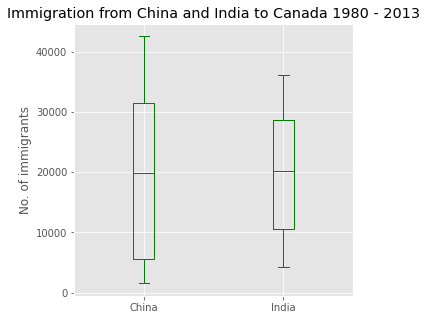

In [10]:
china_india = df_CI.transpose()
china_india.plot(kind='box', figsize=(5,5), color='green')

plt.title('Immigration from China and India to Canada 1980 - 2013')
plt.ylabel('No. of immigrants')

plt.show()

**Question:** Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the *decades* `1980s`, `1990s`, and `2000s`.


Step 1: Get the dataset. Get the top 15 countries based on Total immigrant population. Name the dataframe **df_top15**.

In [11]:
canada_df.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_top15 = canada_df.head(15)
df_top15 = df_top15.loc[:, years]
df_top15

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,...,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,...,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603
United States of America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,6990,8394,9613,9463,10190,8995,8142,7676,7891,8501
Iran (Islamic Republic of),1172,1429,1822,1592,1977,1648,1794,2989,3273,3781,...,6348,5837,7480,6974,6475,6580,7477,7479,7534,11291
Sri Lanka,185,371,290,197,1086,845,1838,4447,2779,2758,...,4495,4930,4714,4123,4756,4547,4422,3309,3338,2394
Republic of Korea,1011,1456,1572,1081,847,962,1208,2338,2805,2979,...,5352,5832,6215,5920,7294,5874,5537,4588,5316,4509
Poland,863,2930,5881,4546,3588,2819,4808,6931,9211,16025,...,1533,1405,1263,1235,1267,1013,795,720,779,852


Step 2: Create a new dataframe which contains the aggregate for each decade. One way to do that:
   1. Create a list of all years in decades 80's, 90's, and 00's.
   2. Slice the original dataframe df_can to create a series for each decade and sum across all years for each country.
   3. Merge the three series into a new data frame. Call your dataframe **new_df**.

In [12]:
top15_80s = df_top15.loc[:, list(map(str, range(1980, 1990)))]
top15_90s = df_top15.loc[:, list(map(str, range(1990, 2000)))]
top15_00s = df_top15.loc[:, list(map(str, range(2000, 2010)))]

new_df = pd.DataFrame({'1980s': top15_80s.sum(axis=1), 
                       '1990s': top15_90s.sum(axis=1), 
                       '2000s': top15_00s.sum(axis=1)})
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


Step 3: Plot the box plots.

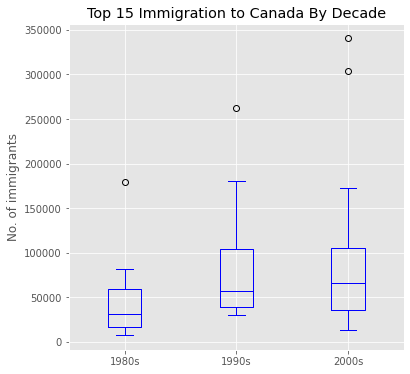

In [13]:
new_df.plot(kind='box', figsize=(6,6), color='blue')

plt.title('Top 15 Immigration to Canada By Decade')
plt.ylabel('No. of immigrants')

plt.show()

**Question**: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013.

Step 1: Get the data:
   1. Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it **df_countries**.
   2. Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe **df_total**.
   3. Reset the index in place.
   4. Rename the columns to **year** and **total**.
   5. Display the resulting dataframe.

In [14]:
df_countries = canada_df.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total.reset_index(inplace=True)
df_total.rename(columns={'index':'year', 0:'total'}, inplace=True)

Step 2: Generate the scatter plot by plotting the total versus year in **df_total**.

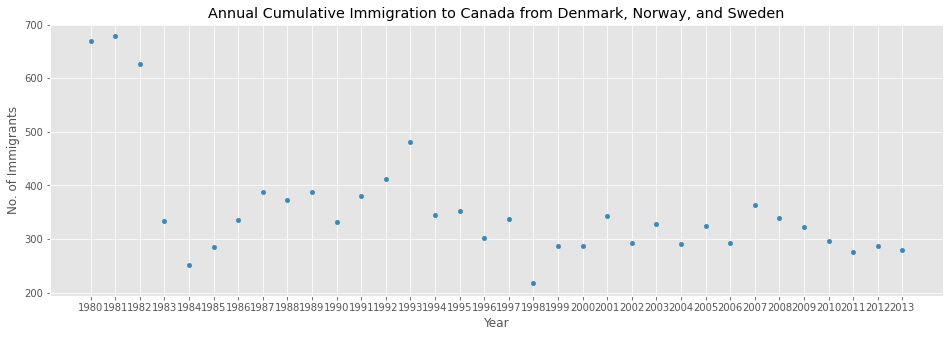

In [15]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(16,5))

plt.xlabel('Year')
plt.ylabel('No. of Immigrants')
plt.title('Annual Cumulative Immigration to Canada from Denmark, Norway, and Sweden')

plt.show()

**Question**: Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use **df_can_t** that we defined and used in the previous example.

Step 1: Normalize the data pertaining to China and India.

In [16]:
df_CI = canada_df.loc[['China', 'India'], years].transpose()
df_CI.index = map(int, df_CI.index)
df_CI.index.name = 'Year'
df_CI.reset_index(inplace=True)

norm_china = (df_CI['China'] - df_CI['China'].min()) / (df_CI['China'].max() - df_CI['China'].min())
norm_india = (df_CI['India'] - df_CI['India'].min()) / (df_CI['India'].max() - df_CI['India'].min())
df_CI

,Year,China,India
0,1980,5123,8880
1,1981,6682,8670
2,1982,3308,8147
3,1983,1863,7338
4,1984,1527,5704
5,1985,1816,4211
6,1986,1960,7150
7,1987,2643,10189
8,1988,2758,11522
9,1989,4323,10343


Step 2: Generate the bubble plots.

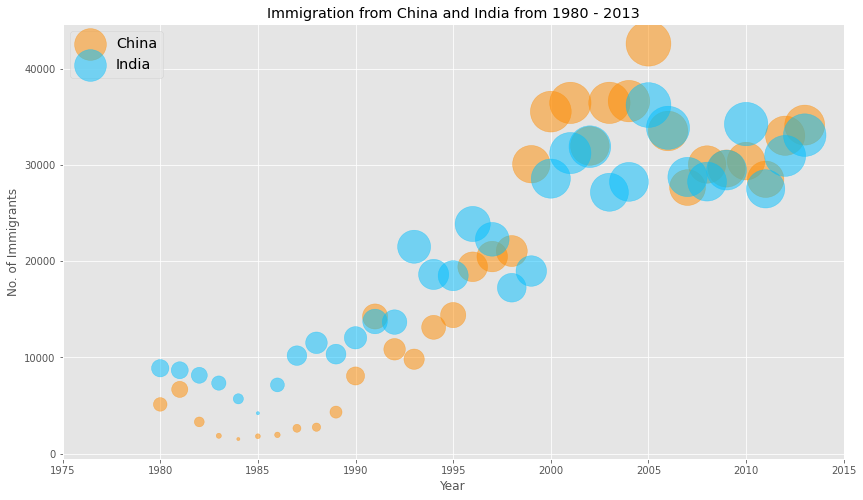

In [17]:
# China
ax0 = df_CI.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='darkorange',
                    s=norm_china * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# India
ax1 = df_CI.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color='deepskyblue',
                    s=norm_india * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('No. of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')